In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob
import pandas as pd

In [41]:

def load_data(project_dir,prefix="test_"):
    result_list=[]
    for path in glob.glob(f"{project_dir}/*/eval/{prefix}*.json"):
        #load eval data
        with open(path,"r") as f:
            d=(json.load(f))

        if d is None:
            continue
        nickname,epochs,r,n_train=path.split("/")[-3].split("_")

        mode=path.split("/")[-1].split("_")[0]
        d["Model"]=nickname
        d["Epochs"]=int(epochs)
        d["r"]=int(r)
        d["Training records"]=int(n_train)
        d["mode"]=mode



        result_list.append(d)

    return result_list



In [42]:
#prediction with reason
result_list=load_data("results/projects/240118comparisons","")
for res in result_list:
    res["Reasoning"]=True

#prediction wo reason
result_list2=load_data("results/projects/240118comparisons_wo_reason","")
for res in result_list2:
    res["Reasoning"]=False

result_list.extend(result_list2)

In [43]:
result_df=pd.DataFrame(result_list)
result_df=result_df[result_df["r"]==32]
result_df=result_df[result_df["Epochs"]==3]

result_df["Condition"]=result_df["mode"]+"-"+result_df["Reasoning"].astype(str)
result_df

,MSE,MAE,R2,Answer ratio,plot,Model,Epochs,r,Training records,mode,Reasoning,Condition
0,12497.629235,91.288776,-0.569964,0.98,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",Llama2-7b-Full,3,32,20,test,True,test-True
1,10591.829625,83.137500,0.164812,1.00,"[{'name': 'Zonisamide', 'smiles': 'NS(=O)(=O)C...",Llama2-7b-Full,3,32,20,train,True,train-True
2,13325.799231,91.561538,-0.327990,0.26,"[{'name': 'acetaldehyde', 'smiles': 'CC=O', 'c...",Llama2-13b-Full,3,32,20,test,True,test-True
3,14398.333333,101.000000,-1.086614,0.30,"[{'name': '1-ethylpiperazine-2,3-dione', 'smil...",Llama2-13b-Full,3,32,20,train,True,train-True
4,14763.504250,92.175000,0.054308,1.00,"[{'name': 'cyclobutane, methylene-', 'smiles':...",Llama2-7b-Full,3,32,10,train,True,train-True
...,...,...,...,...,...,...,...,...,...,...,...,...
78,13006.111650,91.477000,-0.565232,1.00,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",Llama2-7b-Full,3,32,5,test,False,test-False
79,9504.118250,71.527500,-0.342712,0.80,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",Llama2-13b-Full,3,32,100,test,False,test-False
80,17712.725122,109.514634,-0.598023,0.82,"[{'name': '6-nitro-2-phenyl-3H-indol-3-one', '...",Llama2-13b-Full,3,32,100,train,False,train-False
81,10975.257650,79.957000,-0.320827,1.00,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",Llama2-7b-Full,3,32,50,test,False,test-False


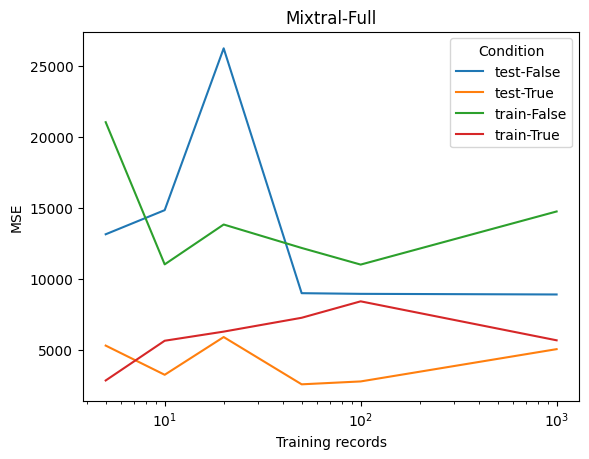

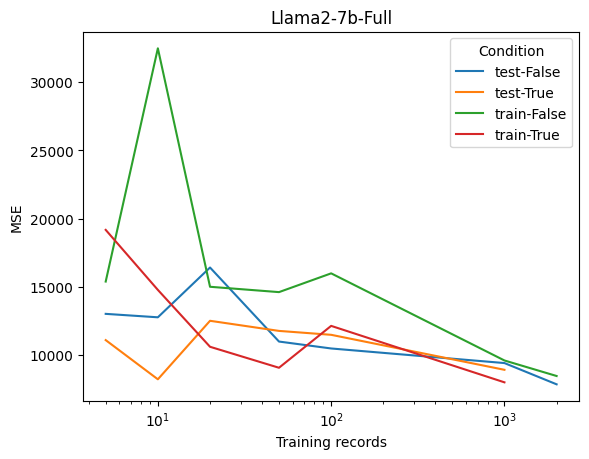

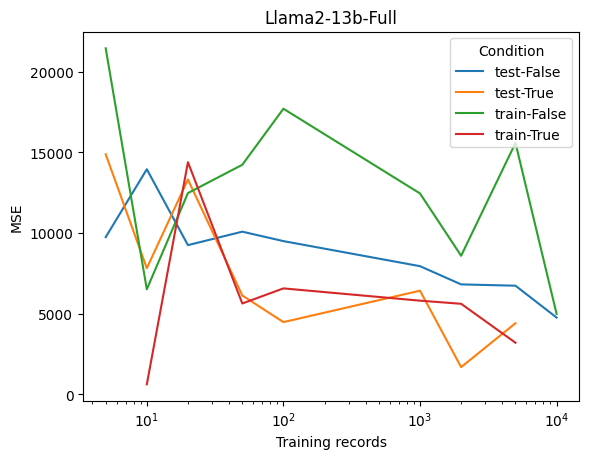

In [46]:
model_list=[
"Mixtral-Full",
"Llama2-7b-Full",
"Llama2-13b-Full",
]

for model in model_list:
    sel_df=result_df[result_df["Model"]==model]
    sel_df=sel_df.sort_values(by="Condition")
    plt.figure()
    sns.lineplot(x="Training records",y="MSE",hue="Condition",data=sel_df)
    plt.title(model)
    plt.xscale("log")

#plt.ylim(4000,12000)

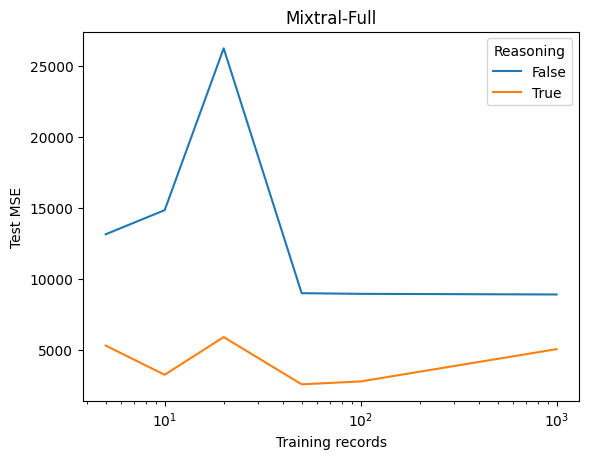

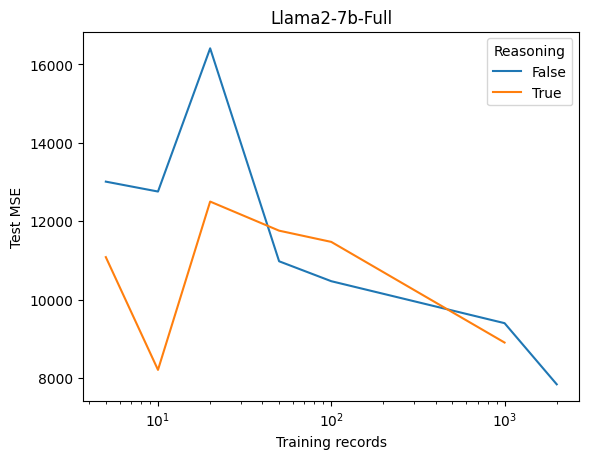

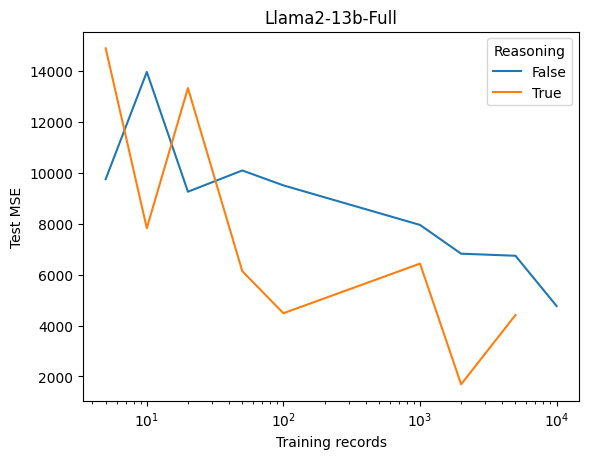

In [47]:

for model in model_list:
    sel_df=result_df[result_df["Model"]==model]
    sel_df=sel_df[sel_df["mode"]=="test"]
    sel_df=sel_df[sel_df["MSE"]<10**5]
    plt.figure()
    sns.lineplot(x="Training records",y="MSE",hue="Reasoning",data=sel_df)
    plt.title(model)
    plt.xscale("log")
    plt.ylabel("Test MSE")

#plt.ylim(4000,12000)